## Import Library

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.ensemble
from sklearn.model_selection import KFold

## Load Data

In [94]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

## Understanding Data

In [95]:
train.shape

(614, 13)

In [96]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [97]:
train.describe()

C:\Users\NiTiN\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [98]:
print(train.isnull().sum(), "\n")
print(test.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


#### Understanding Distribution of Numeric Variables 

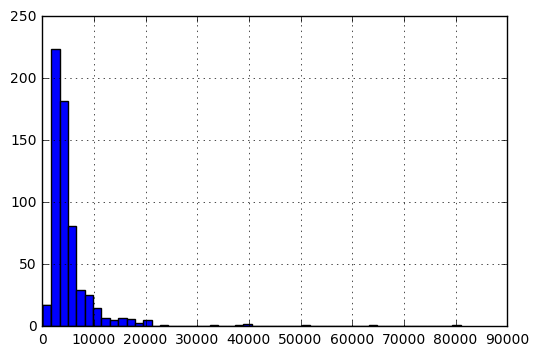

In [99]:
train['ApplicantIncome'].hist(bins = 50)
plt.show()

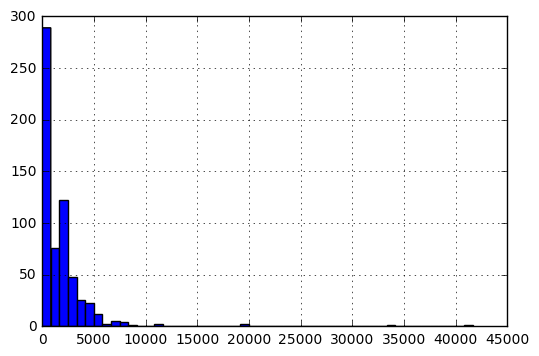

In [49]:
train['CoapplicantIncome'].hist(bins = 50)
plt.show()

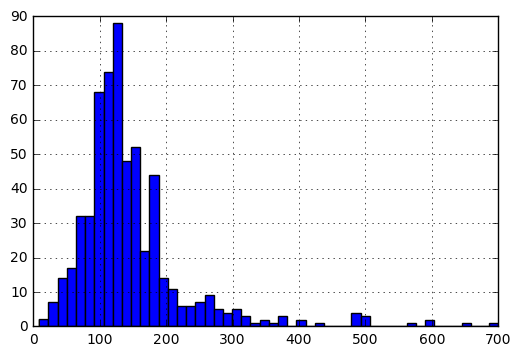

In [50]:
train['LoanAmount'].hist(bins = 50)
plt.show()

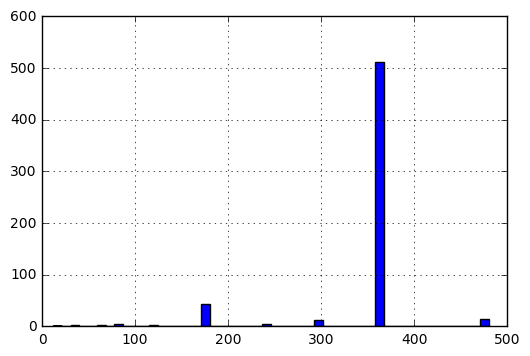

In [51]:
train['Loan_Amount_Term'].hist(bins = 50)
plt.show()

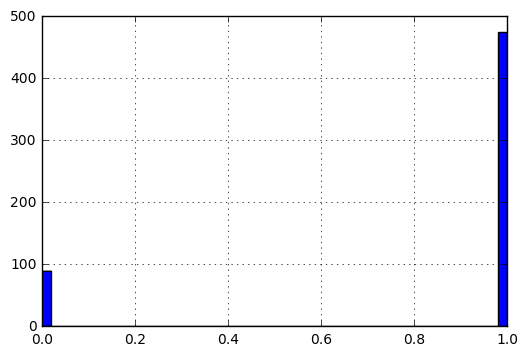

In [52]:
train['Credit_History'].hist(bins = 50)
plt.show()

#### Understanding Distribution of Non Numeric Variables 

In [100]:
print(pd.crosstab(train['Gender'], train['Loan_Status'], margins = True ), "\n")
print(pd.crosstab(train['Married'], train['Loan_Status'], margins = True ), "\n")
print(pd.crosstab(train['Dependents'], train['Loan_Status'], margins = True ), "\n")
print(pd.crosstab(train['Education'], train['Loan_Status'], margins = True ), "\n")
print(pd.crosstab(train['Self_Employed'], train['Loan_Status'], margins = True ), "\n")
print(pd.crosstab(train['Property_Area'], train['Loan_Status'], margins = True ), "\n")

Loan_Status    N    Y  All
Gender                    
Female        37   75  112
Male         150  339  489
All          187  414  601 

Loan_Status    N    Y  All
Married                   
No            79  134  213
Yes          113  285  398
All          192  419  611 

Loan_Status    N    Y  All
Dependents                
0            107  238  345
1             36   66  102
2             25   76  101
3+            18   33   51
All          186  413  599 

Loan_Status     N    Y  All
Education                  
Graduate      140  340  480
Not Graduate   52   82  134
All           192  422  614 

Loan_Status      N    Y  All
Self_Employed               
No             157  343  500
Yes             26   56   82
All            183  399  582 

Loan_Status      N    Y  All
Property_Area               
Rural           69  110  179
Semiurban       54  179  233
Urban           69  133  202
All            192  422  614 



## Label Encoding

In [101]:
number = LabelEncoder()
train['Gender_new'] = number.fit_transform(train['Gender'].astype(str))
train['Married_new'] = number.fit_transform(train['Married'].astype(str))
train['Dependents_new'] = number.fit_transform(train['Dependents'].astype(str))
train['Education_new'] = number.fit_transform(train['Education'].astype(str))
train['Self_Employed_new'] = number.fit_transform(train['Self_Employed'].astype(str))
train['Property_Area_new'] = number.fit_transform(train['Property_Area'].astype(str))
train['Loan_Status_new'] = number.fit_transform(train['Loan_Status'].astype(str))

test['Gender_new'] = number.fit_transform(test['Gender'].astype(str))
test['Married_new'] = number.fit_transform(test['Married'].astype(str))
test['Dependents_new'] = number.fit_transform(test['Dependents'].astype(str))
test['Education_new'] = number.fit_transform(test['Education'].astype(str))
test['Self_Employed_new'] = number.fit_transform(test['Self_Employed'].astype(str))
test['Property_Area_new'] = number.fit_transform(test['Property_Area'].astype(str))

## Filling Missing Data

In [102]:
train['Gender_new'].fillna(train['Gender_new'].median(),inplace=True)
train['Married_new'].fillna(train['Married_new'].median(),inplace=True)
train['Dependents_new'].fillna(train['Dependents_new'].median(),inplace=True)
train['Self_Employed_new'].fillna(train['Self_Employed_new'].median(),inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].median(),inplace=True)

test['Gender_new'].fillna(test['Gender_new'].median(),inplace=True)
test['Married_new'].fillna(test['Married_new'].median(),inplace=True)
test['Dependents_new'].fillna(test['Dependents_new'].median(),inplace=True)
test['Self_Employed_new'].fillna(test['Self_Employed_new'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].median(),inplace=True)

## Feature Selection

In [103]:
predictors = ["Gender_new", "Married_new", "Dependents_new", "Education_new", "Self_Employed_new", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area_new"]

## Training Data

In [104]:
model=sklearn.ensemble.RandomForestClassifier()
model.fit(train[predictors], train["Loan_Status_new"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [105]:
y_pred = model.predict(test[predictors])

In [108]:
y_pred = ['N' if (y == 0) else 'Y' for y in y_pred]

In [109]:
print(y_pred)

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',

## Saving to CSV

In [110]:
from collections import OrderedDict
pred_df = pd.DataFrame(OrderedDict((
        ("Loan_ID", test["Loan_ID"]),
        ("Loan_Status", y_pred)
    )))
pred_df.to_csv('submission.csv', header=True, index=False, cols=["Loan_ID", "Loan_Status"])